In [1]:
import pandas as pd
import numpy as np

import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
from matplotlib.lines import Line2D
%matplotlib inline

C:\Users\prith\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
appended_data = []
#change here to switch between before crisis and after crisis
years = list(map(str, range(2004, 2007)))
quarters = [ 'Q1', 'Q2', 'Q3', 'Q4']
for year in years: 
    for quarter in quarters:
        data2 = pd.read_csv("preprocessed_data/"+ year + quarter +"_stat.csv")
        print(year + quarter, data2.shape)
        appended_data.append(data2)
        
df = pd.concat(appended_data)
    
# Some basic formating  
df.reset_index(inplace = True)
df.drop('index', axis=1, inplace=True)

2004Q1 (452471, 70)
2004Q2 (614487, 70)
2004Q3 (389487, 70)
2004Q4 (361659, 70)
2005Q1 (303611, 70)
2005Q2 (339372, 70)
2005Q3 (440521, 70)
2005Q4 (378311, 70)
2006Q1 (253043, 70)
2006Q2 (291165, 70)
2006Q3 (271373, 70)
2006Q4 (280979, 70)


In [17]:
# collecting all the defaulted loans
data = df[df['COMPLT_FLG'].notnull()].copy(deep=True)
#df[df['zb_code'].isin([2., 3., 9., 15.])]['COMPLT_FLG'].shape  # 1.0s are = 223967, total = 225073

In [18]:
# Removing all columns which contain more than 90% null values
null_count = data.isnull().sum()
null_columns = null_count[null_count > data.shape[0]*(0.9)]
print(null_columns)

prop_ins_ind    223967
DEAL_NAME       223967
mod_ind         219568
MODFG_COST      219171
dtype: int64


In [ ]:
# format the zb_date column
data["zb_date"] = data["zb_date"].astype("Int64").astype(str)
data["zb_date"] = data['zb_date'].str[:4] + '-' + data['zb_date'].str[4:6] + '-' + '01'

In [23]:
date_cols = ['ORIG_DATE', 'FIRST_PAY', 'AQSN_DTE', 'LPI_DTE', 'FCC_DTE', 'DISP_DTE', 'F6_DTE', 'F3_DTE',
       'F4_DTE', 'F1_DTE', 'F2_DTE', 'FCE_DTE', 'FMOD_DTE', 'zb_date',
       'LAST_DTE']
for date_col in date_cols:
    print(date_col)
    data[date_col] = pd.to_datetime(data[date_col], errors="coerce")
    data[f"{date_col}_year"] = data[date_col].dt.year
    data[f"{date_col}_month"] = data[date_col].dt.month

data.drop(date_cols, axis= 1, inplace=True)

AQSN_DTE
LPI_DTE
FCC_DTE
DISP_DTE
F6_DTE
F3_DTE
F4_DTE
F1_DTE
F2_DTE
FCE_DTE
FMOD_DTE
zb_date
LAST_DTE


In [43]:
data['LossGivenDef'] = (data['NET_LOSS']/data['FCE_UPB'])*100

# Exploratory Data analysis

In [44]:
sdata = data[(data['LossGivenDef']>-0.05*10000) & (data['LossGivenDef']<1000)]

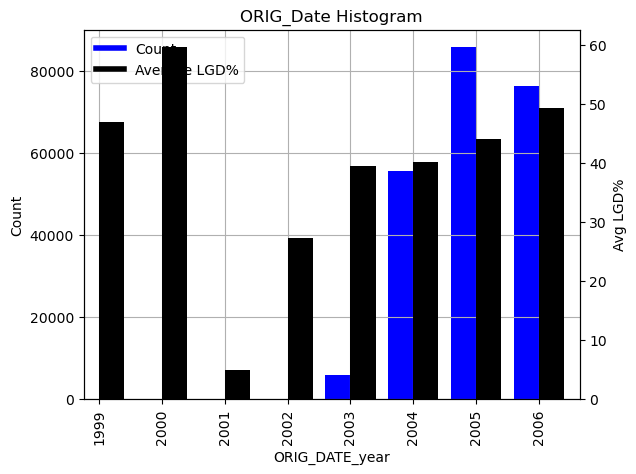

In [46]:
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
width = 0.4

sdata.groupby('ORIG_DATE_year')['LossGivenDef'].count().plot(kind='bar', color='blue', ax=ax, width=width, position=1)
sdata.groupby('ORIG_DATE_year')['LossGivenDef'].mean().plot(kind='bar', color='black', ax=ax2, width=width, position=0)

ax.set_ylabel('Count')
ax.grid() 

ax2.set_ylabel('Avg LGD%')
plt.title("ORIG_Date Histogram")

customlines = [Line2D([0], [0], color='blue', lw = 4),
                Line2D([0], [0], color='black', lw =4)]
ax.legend(customlines, ['Count', 'Average LGD%'])


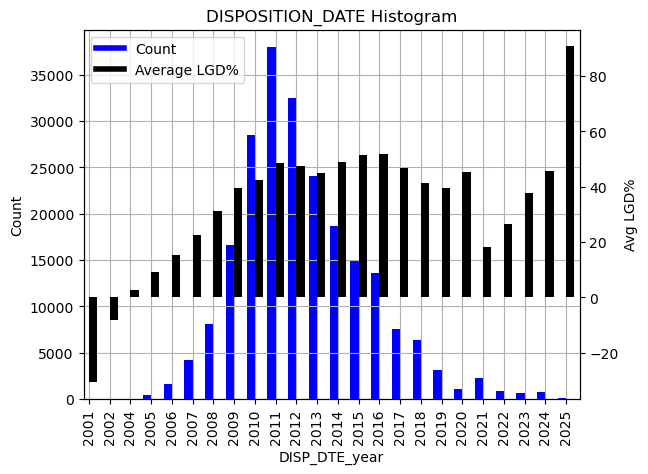

In [48]:
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
width = 0.4

sdata.groupby('DISP_DTE_year')['LossGivenDef'].count().plot(kind='bar', color='blue', ax=ax, width=width, position=1)
sdata.groupby('DISP_DTE_year')['LossGivenDef'].mean().plot(kind='bar', color='black', ax=ax2, width=width, position=0)

ax.set_ylabel('Count')
ax.grid() 

ax2.set_ylabel('Avg LGD%')
plt.title("DISPOSITION_DATE Histogram")

customlines = [Line2D([0], [0], color='blue', lw = 4),
                Line2D([0], [0], color='black', lw =4)]
ax.legend(customlines, ['Count', 'Average LGD%'], loc=2)

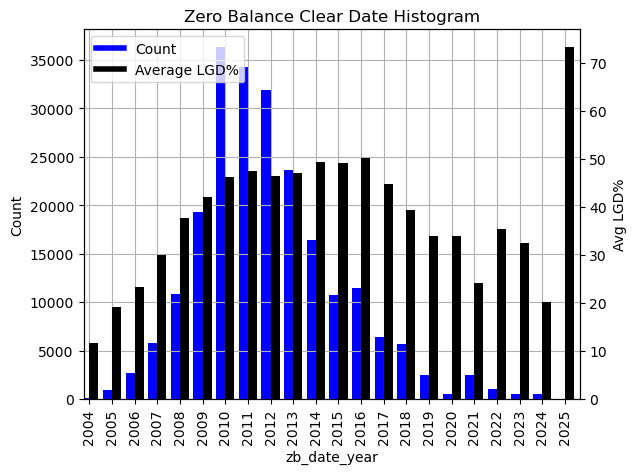

In [49]:
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
width = 0.4

sdata.groupby('zb_date_year')['LossGivenDef'].count().plot(kind='bar', color='blue', ax=ax, width=width, position=1)
sdata.groupby('zb_date_year')['LossGivenDef'].mean().plot(kind='bar', color='black', ax=ax2, width=width, position=0)

ax.set_ylabel('Count')
ax.grid() 

ax2.set_ylabel('Avg LGD%')
plt.title("Zero Balance Clear Date Histogram")

customlines = [Line2D([0], [0], color='blue', lw = 4),
                Line2D([0], [0], color='black', lw =4)]
ax.legend(customlines, ['Count', 'Average LGD%'], loc=2)

plotting the class distribution of the categorical variables

In [50]:
col_types = data.dtypes
list(col_types[col_types == 'object'].index)

['ORIG_CHN',
 'SELLER',
 'FTHB_FLG',
 'purpose',
 'PROP_TYP',
 'occ_stat',
 'state',
 'prod_type',
 'MI_TYPE',
 'relo_flg',
 'hbl_ind',
 'hltv_ref_ind',
 'SERVICER',
 'maturity_date',
 'mod_ind']

In [51]:
series_SELLER = data.SELLER.str.replace('[^\w\s]','')
series_SELLER = series_SELLER.str.lower()

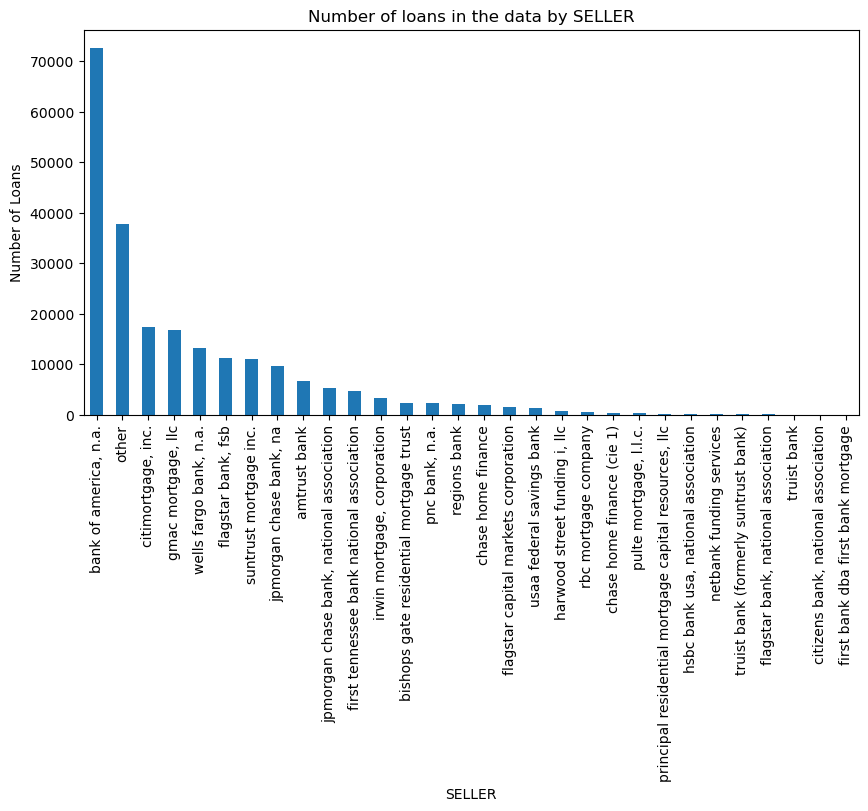

In [52]:
#series_SELLER = data.SELLER
series_SELLER.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of loans in the data by SELLER")
plt.ylabel('Number of Loans')
plt.xlabel('SELLER');

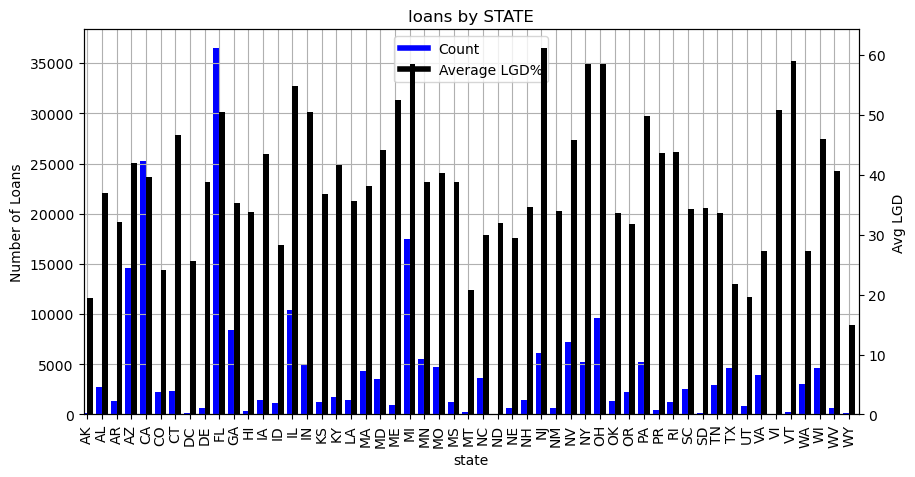

In [53]:
#data.groupby('STATE')['LossGivenDef'].count().nlargest(40).plot(kind='bar', color='black')

fig = plt.figure(figsize=(10,5)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
width = 0.4

sdata.groupby('state')['LossGivenDef'].count().plot(kind='bar', color='blue', ax=ax, width=width, position=1)
sdata.groupby('state')['LossGivenDef'].mean().plot(kind='bar', color='black', ax=ax2, width=width, position=0)

ax.set_ylabel('Number of Loans')
ax.grid() 

ax2.set_ylabel('Avg LGD')
plt.title("loans by STATE")

customlines = [Line2D([0], [0], color='blue', lw = 4),
                Line2D([0], [0], color='black', lw =4)]
ax.legend(customlines, ['Count', 'Average LGD%'], loc =9)

Text(0.5, 1.0, 'loans by by PURPOSE')

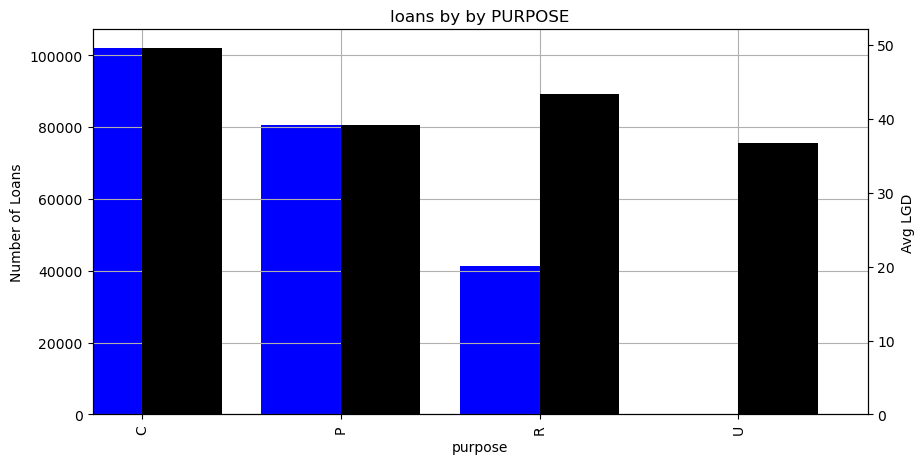

In [55]:
fig = plt.figure(figsize=(10,5)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
width = 0.4

sdata.groupby('purpose')['LossGivenDef'].count().plot(kind='bar', color='blue', ax=ax, width=width, position=1)
sdata.groupby('purpose')['LossGivenDef'].mean().plot(kind='bar', color='black', ax=ax2, width=width, position=0)

ax.set_ylabel('Number of Loans')
ax.grid() 

ax2.set_ylabel('Avg LGD')
plt.title("loans by by PURPOSE")

Text(0.5, 1.0, 'Loss Histogram')

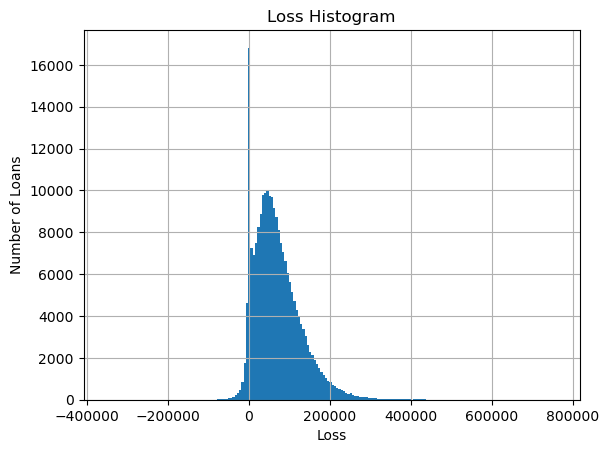

In [56]:
y_series = sdata['NET_LOSS']  #data[(data['LOSS']<1000000) & (data['LOSS']>-0.05*1000000)]

y_series.hist(bins=200)
plt.ylabel('Number of Loans')

plt.xlabel('Loss')
plt.title("Loss Histogram")

Text(0.5, 1.0, 'LGD Histogram')

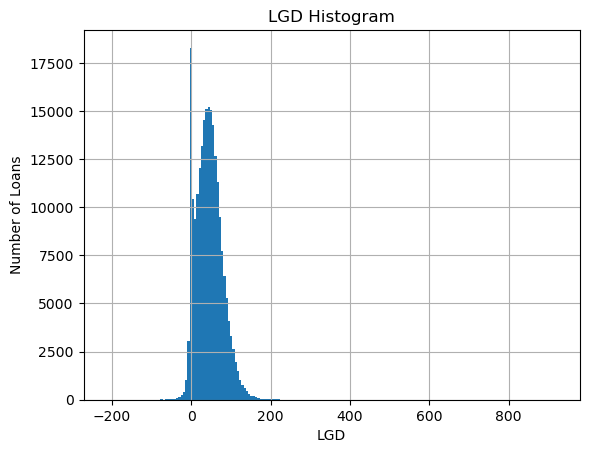

In [57]:
y_series = sdata['LossGivenDef']
y_series.hist(bins=200)

plt.ylabel('Number of Loans')

plt.xlabel('LGD')
plt.title("LGD Histogram")

Numerical columns analysis

In [58]:
col_types = data.dtypes
numerical_cols = list(col_types[col_types != 'object'].index)
numerical_cols

['LOAN_ID',
 'ACT_PERIOD',
 'orig_rt',
 'orig_amt',
 'orig_trm',
 'oltv',
 'ocltv',
 'num_bo',
 'dti',
 'CSCORE_B',
 'CSCORE_C',
 'NUM_UNIT',
 'zip_3',
 'msa',
 'mi_pct',
 'hrp_ind',
 'prop_ins_ind',
 'DEAL_NAME',
 'LAST_UPB',
 'LAST_RT',
 'zb_code',
 'LS_NON_INT_UPB',
 'F6_curr_upb',
 'F3_curr_upb',
 'F4_curr_upb',
 'F1_curr_upb',
 'F2_curr_upb',
 'FCE_UPB',
 'FMOD_UPB',
 'z_num_months_120',
 'MODTRM_CHNG',
 'MODUPB_CHNG',
 'dlq_status',
 'MOD_FLAG',
 'MODFG_COST',
 'CSCORE_MN',
 'ORIG_VAL',
 'COMPLT_FLG',
 'INT_COST',
 'NET_LOSS',
 'AQSN_DTE_year',
 'AQSN_DTE_month',
 'LPI_DTE_year',
 'LPI_DTE_month',
 'FCC_DTE_year',
 'FCC_DTE_month',
 'DISP_DTE_year',
 'DISP_DTE_month',
 'F6_DTE_year',
 'F6_DTE_month',
 'F3_DTE_year',
 'F3_DTE_month',
 'F4_DTE_year',
 'F4_DTE_month',
 'F1_DTE_year',
 'F1_DTE_month',
 'F2_DTE_year',
 'F2_DTE_month',
 'FCE_DTE_year',
 'FCE_DTE_month',
 'FMOD_DTE_year',
 'FMOD_DTE_month',
 'zb_date_year',
 'zb_date_month',
 'LAST_DTE_year',
 'LAST_DTE_month',
 'ORIG_D

C:\Users\prith\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\prith\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


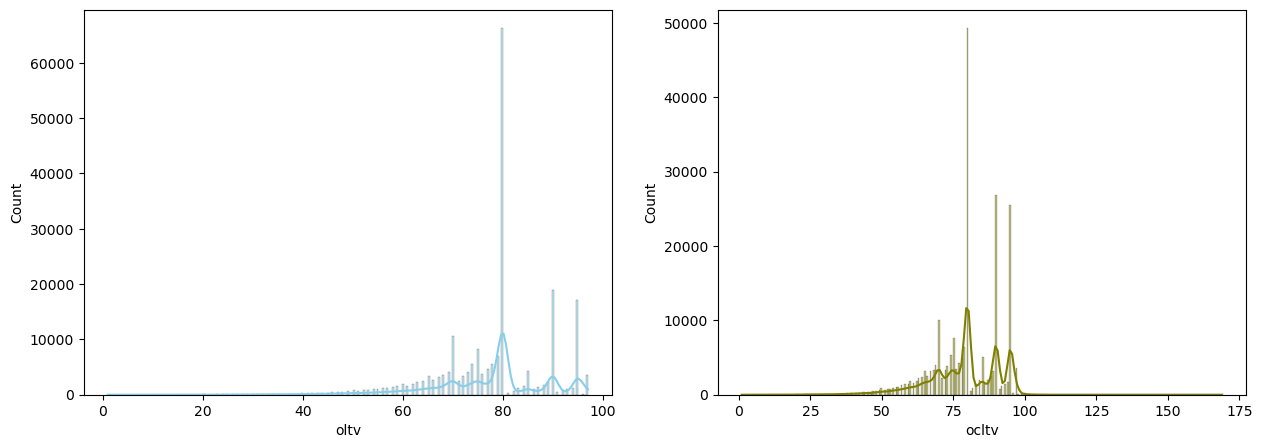

In [61]:
# Check the distribution after removing outliers using histogram
fig, axs = plt.subplots(1,2, figsize=(15, 5))
      
sns.histplot(data= data, x="oltv", kde=True, color="skyblue", ax=axs[0])
sns.histplot(data= data, x="ocltv", kde=True, color="olive", ax=axs[1])

plt.show()

C:\Users\prith\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\prith\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


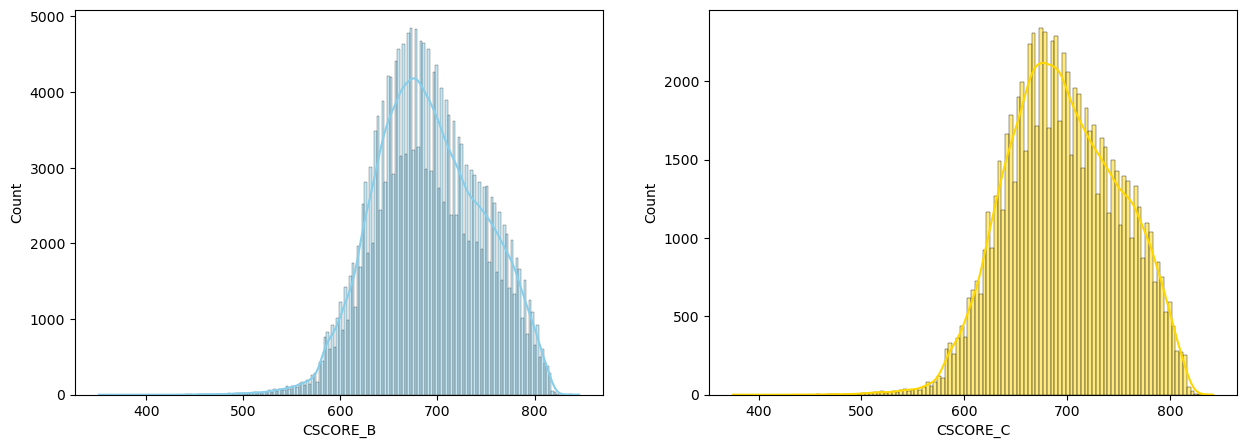

In [68]:
# Check the distribution after removing outliers using histogram
fig, axs = plt.subplots(1,2, figsize=(15, 5))
      
sns.histplot(data= data, x="CSCORE_B", kde=True, color="skyblue", ax=axs[0])
sns.histplot(data= data, x="CSCORE_C", kde=True, color="gold", ax=axs[1])
plt.show()

In [71]:
process_numerical_cols = ['orig_rt',
 'orig_amt',
 'orig_trm',
 'oltv',
 'ocltv',
 'num_bo',
 'dti',
 'CSCORE_B',
 'CSCORE_C',
 'NUM_UNIT',
 'zip_3',
 'msa',
 'mi_pct',
 'LAST_UPB',
 'LAST_RT',
 'zb_code',]

<Axes: >

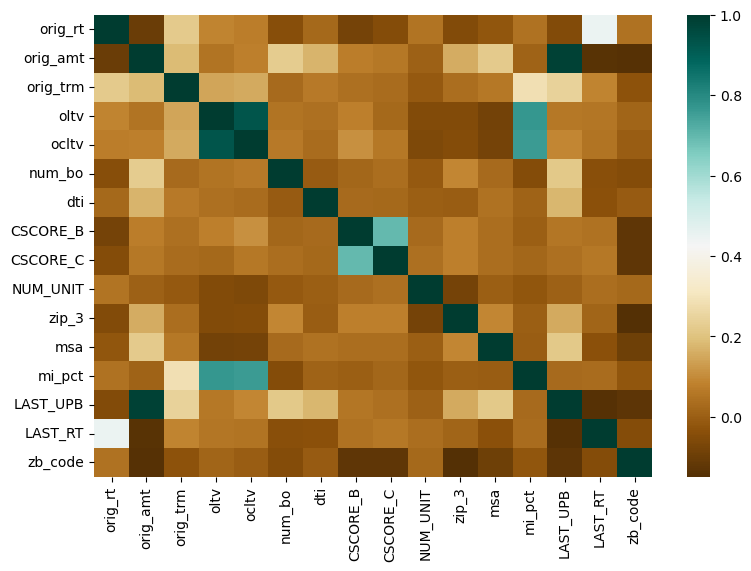

In [72]:
plt.figure(figsize=(9,6))

c= data[process_numerical_cols].corr()
sns.heatmap(c,cmap="BrBG",fmt='.3g')


C:\Users\prith\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\prith\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\prith\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\prith\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

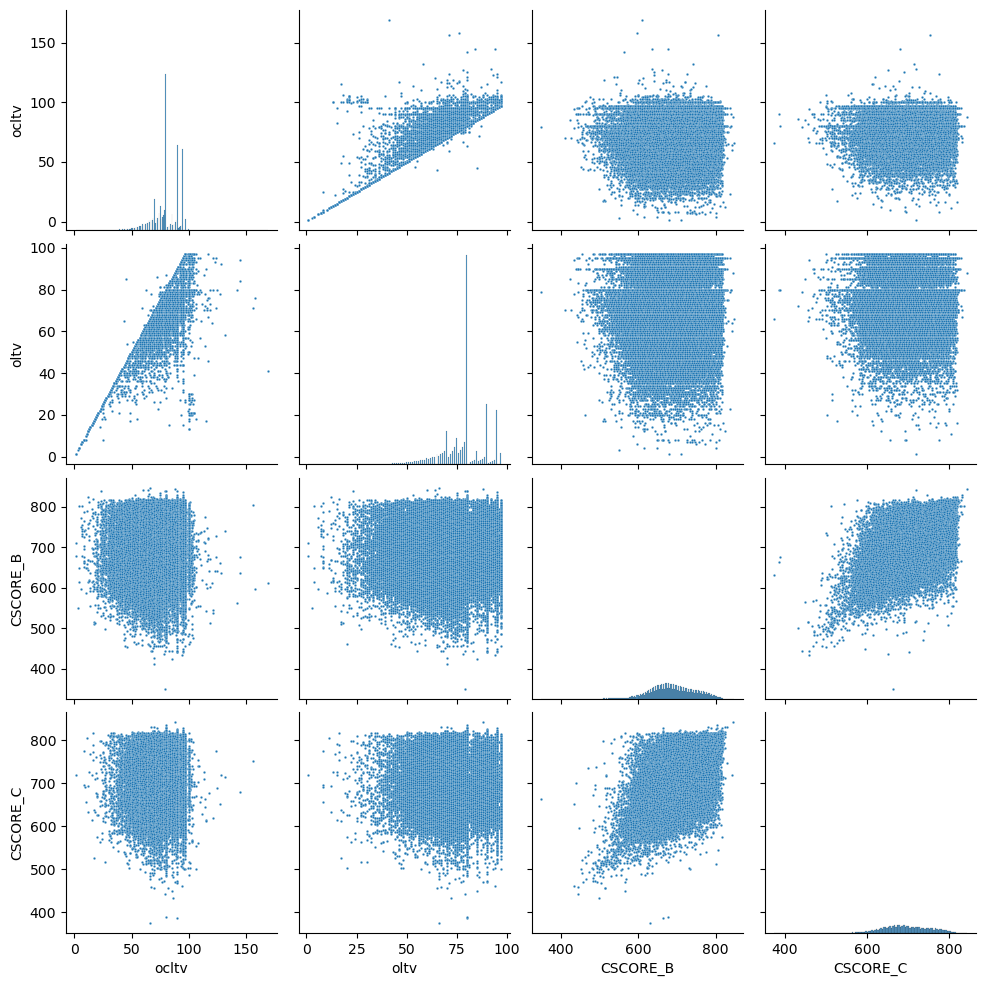

In [74]:
sns.pairplot(data[['ocltv', 'oltv', 'CSCORE_B', 'CSCORE_C']], plot_kws={"s": 3})

Text(0, 0.5, 'LGD')

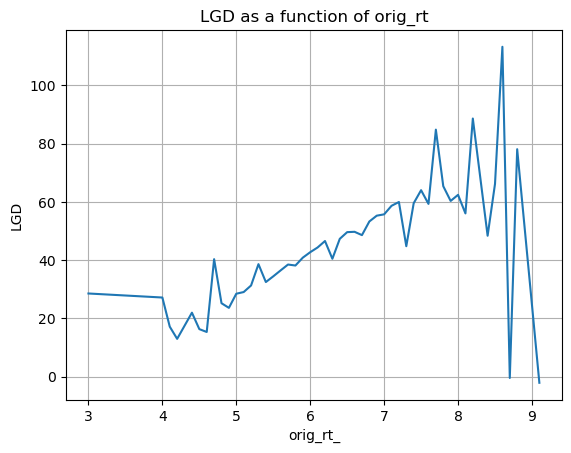

In [75]:
#sdata['MI_PCT'] = (sdata['orig_rt']//10)*10
sdata['orig_rt_'] = sdata['orig_rt'].round(1)
plot_1 = sdata.groupby('orig_rt_', as_index=False)['LossGivenDef'].mean()
plot_1.index = plot_1.orig_rt_
plot_1['LossGivenDef'].plot(grid=True)
plt.title('LGD as a function of orig_rt')
plt.ylabel('LGD')